In [3]:
### **Librerías** Prueba Yonatan

In [4]:
from sklearn.datasets import load_files   
import openpyxl
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
import io
import xlrd
import glob
from pandas import ExcelFile
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import datetime as dt
from datetime import date, timedelta
import seaborn as sns
from scipy import stats
import calendar
import matplotlib.pyplot as mplt
from pandas import Grouper
import matplotlib.dates as mdates 
import warnings
warnings.filterwarnings("ignore")
from pandas.tseries.offsets import *
from pandas.tseries.holiday import USFederalHolidayCalendar
from datetime import datetime
import matplotlib.ticker as mtick
from matplotlib import ticker
from matplotlib import*

#### **Lectura y transformaciones básicas de los datos**

In [5]:
data_DA = pd.read_csv("../Datos/CasosPositivosCOVID19_Colombia.csv")
data_DA

,Unnamed: 0,id_de_caso,fecha_de_notificaci_n,c_digo_divipola,ciudad_de_ubicaci_n,departamento,atenci_n,edad,sexo,tipo,...,fis,fecha_diagnostico,fecha_recuperado,fecha_reporte_web,tipo_recuperaci_n,codigo_departamento,codigo_pais,pertenencia_etnica,nombre_grupo_etnico,fecha_de_muerte
0,0,1,2020-03-02T00:00:00.000,11001,Bogotá D.C.,Bogotá D.C.,Recuperado,19,F,Importado,...,2020-02-27T00:00:00.000,2020-03-06T00:00:00.000,2020-03-13T00:00:00.000,2020-03-06T00:00:00.000,PCR,11,380.0,Otro,NaN,NaN
1,1,2,2020-03-06T00:00:00.000,76111,Guadalajara de Buga,Valle del Cauca,Recuperado,34,M,Importado,...,2020-03-04T00:00:00.000,2020-03-09T00:00:00.000,2020-03-19T00:00:00.000,2020-03-09T00:00:00.000,PCR,76,724.0,Otro,NaN,NaN
2,2,3,2020-03-07T00:00:00.000,5001,Medellín,Antioquia,Recuperado,50,F,Importado,...,2020-02-29T00:00:00.000,2020-03-09T00:00:00.000,2020-03-15T00:00:00.000,2020-03-09T00:00:00.000,PCR,5,724.0,Otro,NaN,NaN
3,3,4,2020-03-09T00:00:00.000,5001,Medellín,Antioquia,Recuperado,55,M,Relacionado,...,2020-03-06T00:00:00.000,2020-03-11T00:00:00.000,2020-03-26T00:00:00.000,2020-03-11T00:00:00.000,PCR,5,NaN,Otro,NaN,NaN
4,4,5,2020-03-09T00:00:00.000,5001,Medellín,Antioquia,Recuperado,25,M,Relacionado,...,2020-03-08T00:00:00.000,2020-03-11T00:00:00.000,2020-03-23T00:00:00.000,2020-03-11T00:00:00.000,PCR,5,NaN,Otro,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513714,714,513755,2020-08-09T00:00:00.000,20001,Valledupar,Cesar,Casa,7,M,En estudio,...,2020-08-05T00:00:00.000,2020-08-20T00:00:00.000,NaN,2020-08-20T00:00:00.000,NaN,20,NaN,NaN,NaN,NaN
513715,715,513756,2020-08-09T00:00:00.000,20001,Valledupar,Cesar,Casa,24,M,En estudio,...,2020-08-05T00:00:00.000,2020-08-20T00:00:00.000,NaN,2020-08-20T00:00:00.000,NaN,20,NaN,NaN,NaN,NaN
513716,716,513757,2020-08-09T00:00:00.000,44001,Riohacha,La Guajira,Casa,31,F,En estudio,...,2020-08-06T00:00:00.000,2020-08-20T00:00:00.000,NaN,2020-08-20T00:00:00.000,NaN,44,NaN,NaN,NaN,NaN
513717,717,513758,2020-08-09T00:00:00.000,50001,Villavicencio,Meta,Casa,53,M,En estudio,...,2020-08-02T00:00:00.000,2020-08-20T00:00:00.000,NaN,2020-08-20T00:00:00.000,NaN,50,NaN,NaN,NaN,NaN


In [5]:
data_DA['fecha_reporte_web'] = pd.to_datetime(data_DA['fecha_reporte_web']).dt.tz_localize(None) 
data_DA['Mes'] = data_DA['fecha_reporte_web'].dt.month
data_DA['Año'] = data_DA['fecha_reporte_web'].dt.year
data_DA

,Unnamed: 0,id_de_caso,fecha_de_notificaci_n,c_digo_divipola,ciudad_de_ubicaci_n,departamento,atenci_n,edad,sexo,tipo,...,fecha_recuperado,fecha_reporte_web,tipo_recuperaci_n,codigo_departamento,codigo_pais,pertenencia_etnica,nombre_grupo_etnico,fecha_de_muerte,Mes,Año
0,0,1,2020-03-02T00:00:00.000,11001,Bogotá D.C.,Bogotá D.C.,Recuperado,19,F,Importado,...,2020-03-13T00:00:00.000,2020-03-06,PCR,11,380.0,Otro,NaN,NaN,3,2020
1,1,2,2020-03-06T00:00:00.000,76111,Guadalajara de Buga,Valle del Cauca,Recuperado,34,M,Importado,...,2020-03-19T00:00:00.000,2020-03-09,PCR,76,724.0,Otro,NaN,NaN,3,2020
2,2,3,2020-03-07T00:00:00.000,5001,Medellín,Antioquia,Recuperado,50,F,Importado,...,2020-03-15T00:00:00.000,2020-03-09,PCR,5,724.0,Otro,NaN,NaN,3,2020
3,3,4,2020-03-09T00:00:00.000,5001,Medellín,Antioquia,Recuperado,55,M,Relacionado,...,2020-03-26T00:00:00.000,2020-03-11,PCR,5,NaN,Otro,NaN,NaN,3,2020
4,4,5,2020-03-09T00:00:00.000,5001,Medellín,Antioquia,Recuperado,25,M,Relacionado,...,2020-03-23T00:00:00.000,2020-03-11,PCR,5,NaN,Otro,NaN,NaN,3,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599909,909,599950,2020-08-16T00:00:00.000,25754,Soacha,Cundinamarca,Casa,52,F,En estudio,...,NaN,2020-08-29,NaN,25,NaN,NaN,NaN,NaN,8,2020
599910,910,599951,2020-08-23T00:00:00.000,11001,Bogotá D.C.,Bogotá D.C.,Casa,6,M,En estudio,...,NaN,2020-08-29,NaN,11,NaN,NaN,NaN,NaN,8,2020
599911,911,599952,2020-08-25T00:00:00.000,11001,Bogotá D.C.,Bogotá D.C.,Casa,23,F,En estudio,...,NaN,2020-08-29,NaN,11,NaN,NaN,NaN,NaN,8,2020
599912,912,599953,2020-08-28T00:00:00.000,11001,Bogotá D.C.,Bogotá D.C.,Hospital,0,F,En estudio,...,NaN,2020-08-29,NaN,11,NaN,NaN,NaN,NaN,8,2020


In [6]:
ciudades_ppales = data_DA.loc[data_DA['ciudad_de_ubicaci_n'].isin(['Medellín','Bogotá D.C.','Cali','Barranquilla','Cartagena de Indias'])]

In [41]:
data_inicio = ciudades_ppales.groupby (['fecha_reporte_web','Mes','Año']).id_de_caso.count()
data_inicio = data_inicio.to_frame()
data_inicio = pd.DataFrame(data_inicio)

In [42]:
data_inicio['fecha_reporte_web'] = data_inicio.index.map(lambda x: datetime.date(x.year, x.month, 1))


AttributeError: 'tuple' object has no attribute 'year'

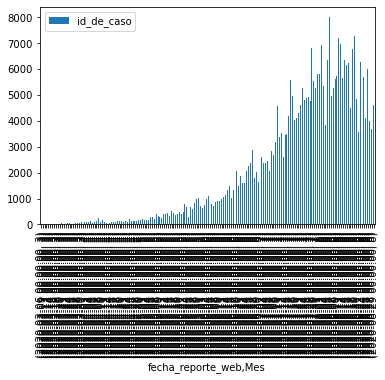

In [38]:
data_serie =pd.DataFrame(data_inicio)
data_serie.plot.bar()

In [24]:
data_inicio.index = data_inicio.index.strftime('%Y-%m-%d')

AttributeError: 'MultiIndex' object has no attribute 'strftime'

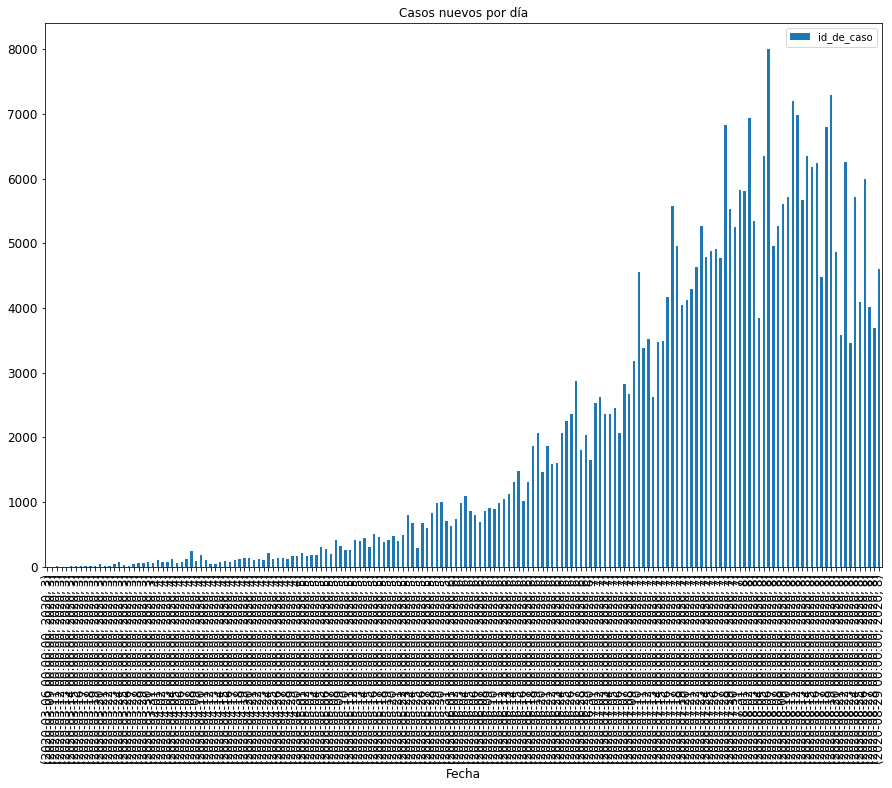

In [22]:
ax = data_inicio.plot(kind = 'bar', title ="Casos nuevos por día", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Fecha", fontsize=12)
def line_format(ax):
    month = ax.month_name()[:3]
    if month == 'Mar':
        month += f'\n{ax.year}'
    return month


plt.show()

In [13]:
casos_confirmados = data_DA['id_de_caso'].count()
casos_confirmados

599914

In [17]:
conteo = data_DA.groupby('atenci_n').count()
conteo

,Unnamed: 0,id_de_caso,fecha_de_notificaci_n,c_digo_divipola,ciudad_de_ubicaci_n,departamento,edad,sexo,tipo,estado,...,fecha_diagnostico,fecha_recuperado,fecha_reporte_web,tipo_recuperaci_n,codigo_departamento,codigo_pais,pertenencia_etnica,nombre_grupo_etnico,fecha_de_muerte,Mes
atenci_n,,,,,,,,,,,,,,,,,,,,,
Casa,116802,116802,116802,116802,116802,116802,116802,116802,116802,116802,...,116786,0,116802,0,116802,0,1602,331,0,116802
Fallecido,19064,19064,19064,19064,19064,19064,19064,19064,19064,19064,...,18860,0,19064,0,19064,23,11663,288,19064,19064
Hospital,20280,20280,20280,20280,20280,20280,20280,20280,20280,20280,...,20210,0,20280,0,20280,4,7838,265,0,20280
Hospital UCI,1958,1958,1958,1958,1958,1958,1958,1958,1958,1958,...,1947,0,1958,0,1958,0,1108,32,0,1958
Recuperado,440574,440574,440574,440574,440574,440574,440574,440574,440574,440446,...,437057,440574,440574,440574,440574,935,258444,7193,126,440574
hospital,1,1,1,1,1,1,1,1,1,1,...,1,0,1,0,1,0,0,0,0,1


In [18]:
conteo_estado = conteo['Unnamed: 0']
conteo_estado = conteo_estado.to_frame() 

#### **Conteo por estado**

In [19]:
conteo_estado.sort_values(by='Unnamed: 0', ascending=False)

,Unnamed: 0
atenci_n,
Recuperado,440574
Casa,116802
Hospital,20280
Fallecido,19064
Hospital UCI,1958
hospital,1


En el conteo por estado se observa el comportamiento del total de casos positivos de COVID-19 en Colombia.

Con el fin de tener un panorama detallado de este comportamiento, se evalúan las cinco principales ciudades de Colombia.

In [21]:
agr_ciudad = ciudades_ppales.groupby (['ciudad_de_ubicaci_n']).fecha_reporte_web.count()
agr_ciudad = agr_ciudad.to_frame()
agr_ciudad = pd.DataFrame(agr_ciudad)

In [170]:
agr_ciudad.columns = ['Cantidad']

In [188]:
agr_ciudad.sort_values("Cantidad", axis = 0, ascending = True, 
                 inplace = True)
agr_ciudad

,Cantidad
ciudad_de_ubicaci_n,
Cartagena de Indias,20269
Barranquilla,35985
Cali,36221
Medellín,45794
Bogotá D.C.,207403


Text(5, 0, '207403.0')

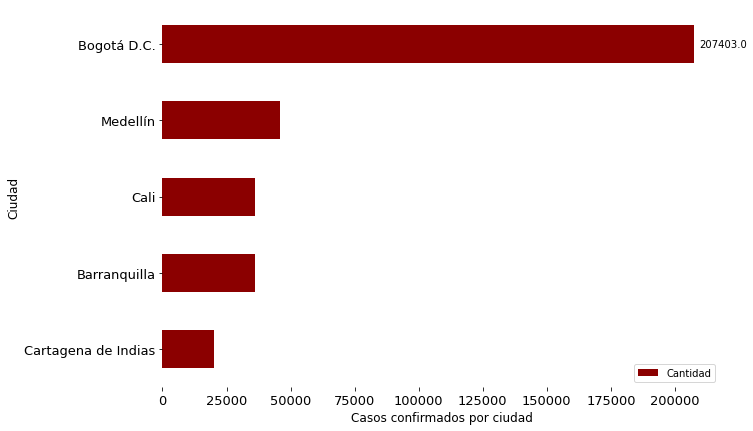

In [186]:
y_label = agr_ciudad[['Cantidad']]
ax = agr_ciudad.plot(kind='barh', figsize=(10,7),
                                        color="darkred", fontsize=13);

ax.set_xlabel("Casos confirmados por ciudad",  size=12)
ax.set_ylabel("Ciudad", size=12)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

rects = ax.patches
def add_value_labels(ax, spacing=5):
    
    for rect in ax.patches:
          
        x_value = rect.get_width()
        y_value = rect.get_y() + rect.get_height() / 2
    # Number of points between bar and label. Change to your liking.
        space = spacing
#     # Vertical alignment for positive values
#         ha = 'left'    
#         if x_value < 0:
#             space *= -1
#             ha = 'right'
    label = "{:" ">6.1f}%".format(x_value)    
    
plt.annotate(label, (x_value, y_value), xytext=(space,0), textcoords="offset points", va='center', ha=ha) 

In [63]:
bin_range = np.arange(0,25)
out, bins  = pd.cut(agr_ciudad.ciudad_de_ubicaci_n, bins=bin_range, include_lowest=True, right=False, retbins=True)
out.cat.categories = bins[:-1]
hist, edges = np.histogram(out, bins=bins)
norm = plt.Normalize(hist.min(), hist.max())
colors = plt.cm.Greens(0.4+0.75 * norm(hist)) 
ax = out.value_counts(sort=False).plot.bar(hist, color=colors)
plt.title("Confirmados en las ciudades principales")
plt.xlabel("Conteo ")
plt.ylabel("Precio máx")
for spine in ax.spines:
    ax.spines[spine].set_visible(False)

AttributeError: 'DataFrame' object has no attribute 'ciudad_de_ubicaci_n'

In [ ]:
# Conteo diario
data_grp_dia = data_DA.groupby (['fecha_reporte_web']).id_de_caso.count()
data_grp_dia.plot(figsize = (15,5), color = 'red')
plt.title("Nuevos casos por día")

In [ ]:
#conteo máx por mes
data_grp_max_mes = data_DA.groupby (['Mes']).id_de_caso.count()
data_grp_max_mes.plot(figsize = (15,5), color = 'blue')
plt.title("Nuevos casos por Mes")

Se evidencia en el detalle diario y mensual una tendencia a la alza en la cantidad de nuevos casos positivos por día/mes para COVID-19.

In [ ]:
plt.hist(data_DA['edad'], bins=10)

In [7]:
casos_fallecidos = data_DA.loc[data_DA['atenci_n'].isin(['Fallecido'])] 
casos_fallecidos

,Unnamed: 0,id_de_caso,fecha_de_notificaci_n,c_digo_divipola,ciudad_de_ubicaci_n,departamento,atenci_n,edad,sexo,tipo,...,fecha_diagnostico,fecha_recuperado,fecha_reporte_web,tipo_recuperaci_n,codigo_departamento,codigo_pais,pertenencia_etnica,nombre_grupo_etnico,fecha_de_muerte,Mes
151,151,152,2020-03-18T00:00:00.000,11001,Bogotá D.C.,Bogotá D.C.,Fallecido,65,M,Importado,...,2020-03-20T00:00:00.000,NaN,2020-03-20,NaN,11,840.0,Otro,NaN,2020-04-05T00:00:00.000,3
152,152,153,2020-03-18T00:00:00.000,11001,Bogotá D.C.,Bogotá D.C.,Fallecido,53,F,Relacionado,...,2020-03-20T00:00:00.000,NaN,2020-03-20,NaN,11,NaN,Otro,NaN,2020-04-06T00:00:00.000,3
156,156,157,2020-03-20T00:00:00.000,47001,Santa Marta,Santa Marta D.T. y C.,Fallecido,88,M,Relacionado,...,2020-03-20T00:00:00.000,NaN,2020-03-20,NaN,47,NaN,Otro,NaN,2020-03-23T00:00:00.000,3
187,187,188,2020-03-17T00:00:00.000,76892,Yumbo,Valle del Cauca,Fallecido,70,F,Relacionado,...,2020-03-21T00:00:00.000,NaN,2020-03-21,NaN,76,NaN,Otro,NaN,2020-03-22T00:00:00.000,3
196,196,197,2020-03-13T00:00:00.000,13001,Cartagena de Indias,Cartagena D.T. y C.,Fallecido,58,M,Relacionado,...,2020-03-16T00:00:00.000,NaN,2020-03-16,NaN,13,NaN,Otro,NaN,2020-03-16T00:00:00.000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580248,248,580289,2020-08-15T00:00:00.000,11001,Bogotá D.C.,Bogotá D.C.,Fallecido,60,F,En estudio,...,2020-08-16T00:00:00.000,NaN,2020-08-27,NaN,11,NaN,NaN,NaN,2020-08-15T00:00:00.000,8
581048,48,581089,2020-08-25T00:00:00.000,5088,Bello,Antioquia,Fallecido,68,M,En estudio,...,2020-08-24T00:00:00.000,NaN,2020-08-27,NaN,5,NaN,NaN,NaN,2020-08-22T00:00:00.000,8
581135,135,581176,2020-08-26T00:00:00.000,5001,Medellín,Antioquia,Fallecido,86,F,En estudio,...,2020-08-26T00:00:00.000,NaN,2020-08-27,NaN,5,NaN,NaN,NaN,2020-08-27T00:00:00.000,8
581458,458,581499,2020-08-23T00:00:00.000,20228,Curumaní,Cesar,Fallecido,67,M,En estudio,...,2020-08-25T00:00:00.000,NaN,2020-08-27,NaN,20,NaN,NaN,NaN,2020-08-22T00:00:00.000,8


(array([  32.,   44.,  292.,  767., 1802., 3816., 4892., 4934., 2075.,
         113.]),
 array([  0. ,  10.7,  21.4,  32.1,  42.8,  53.5,  64.2,  74.9,  85.6,
         96.3, 107. ]),
 <a list of 10 Patch objects>)

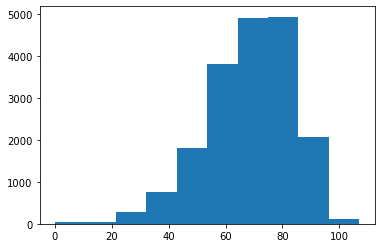

In [8]:
plt.hist(casos_fallecidos['edad'], bins=10) 